In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://koodiklinikka.github.io/palkkakysely/2022/data.html'

In [7]:
salaries_tables = pd.read_html(url)

In [8]:
salaries = salaries_tables[0]

In [11]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 25 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Timestamp                                                                  684 non-null    object 
 1   Oletko palkansaaja vai laskuttaja?                                         684 non-null    object 
 2   Ikä                                                                        681 non-null    object 
 3   Sukupuoli                                                                  631 non-null    object 
 4   Työkokemus                                                                 680 non-null    float64
 5   Montako vuotta olet tehnyt laskuttavaa työtä alalla?                       67 non-null     float64
 6   Palvelut                                                  

In [12]:
salaries.head()

,Timestamp,Oletko palkansaaja vai laskuttaja?,Ikä,Sukupuoli,Työkokemus,Montako vuotta olet tehnyt laskuttavaa työtä alalla?,Palvelut,"Tuntilaskutus (ALV 0%, euroina)","Vuosilaskutus (ALV 0%, euroina)",Hankitko asiakkaasi itse suoraan vai käytätkö välitysfirmojen palveluita?,...,Rooli,Etä- vai lähityö,Kuukausipalkka,Vuositulot,Vapaa kuvaus kokonaiskompensaatiomallista,Kilpailukykyinen,Vapaa sana,Ideoita ensi vuoden kyselyyn,Etä,Kk-tulot
0,2022-09-26 16:35:50.002,Palkansaaja,31-35 v,mies,12.0,NaN,NaN,NaN,NaN,NaN,...,Teknologiajohtaja,Jotain siltä väliltä,6500.0,81250.0,NaN,True,NaN,NaN,50/50,6770.833333
1,2022-09-26 16:37:21.049,Palkansaaja,31-35 v,mies,16.0,NaN,NaN,NaN,NaN,NaN,...,Ohjelmistokehittäjä,Pääosin tai kokonaan etätyö,9000.0,117000.0,NaN,True,NaN,NaN,Etä,9750.000000
2,2022-09-26 16:38:47.396,Palkansaaja,31-35 v,mies,16.0,NaN,NaN,NaN,NaN,NaN,...,Full-stack-ohjelmistokehittäjä,Jotain siltä väliltä,5000.0,62500.0,NaN,False,NaN,NaN,50/50,5208.333333
3,2022-09-26 16:39:47.534,Palkansaaja,36-40 v,mies,13.0,NaN,NaN,NaN,NaN,NaN,...,Devaaja,Jotain siltä väliltä,5100.0,63750.0,NaN,False,NaN,NaN,50/50,5312.500000
4,2022-09-26 16:41:09.685,Laskuttaja,26-30 v,mies,6.0,1.0,"Data-analytiikka, Arkkitehtuuri, Data Engineer...",90.0,160000.0,Käytän välitysfirmoja,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
under_5_salaries = salaries[salaries['Työkokemus'] < 5.1]

In [19]:
# How many answers from people with 5 years or less working experience?
len(under_5_salaries)

184

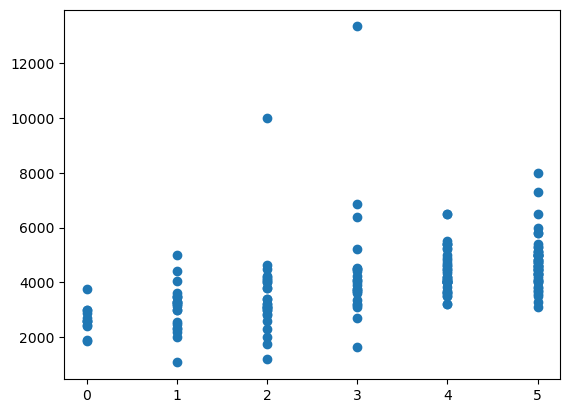

In [66]:
# Simple scatter plot of individuals salaries based on working experience
scatter_x = under_5_salaries['Työkokemus']
scatter_y = under_5_salaries['Kuukausipalkka']
plt.scatter(scatter_x,scatter_y)

In [33]:
# Mean salaries of people with 1 year or less working experience rounded to two decimals
round(under_5_salaries.loc[under_5_salaries['Työkokemus'] < 1.1,'Kuukausipalkka'].mean(),2)

2931.53

In [49]:
# Mean monthly salary, monthly income and yearly income based on working experience
# Also, dropping rows with NaN's and rounding results 
mean_salaries = salaries.groupby(['Työkokemus']).mean()[['Kuukausipalkka','Kk-tulot','Vuositulot']].dropna().round(0)

In [51]:
mean_salaries

,Kuukausipalkka,Kk-tulot,Vuositulot
Työkokemus,,,
0.0,2649.0,2765.0,33176.0
1.0,3086.0,3260.0,39118.0
2.0,3516.0,3938.0,47252.0
3.0,4408.0,4854.0,58253.0
4.0,4416.0,4763.0,57160.0
5.0,4711.0,4866.0,58389.0
6.0,4878.0,5319.0,63823.0
7.0,5280.0,5620.0,67446.0
8.0,5557.0,5916.0,70992.0


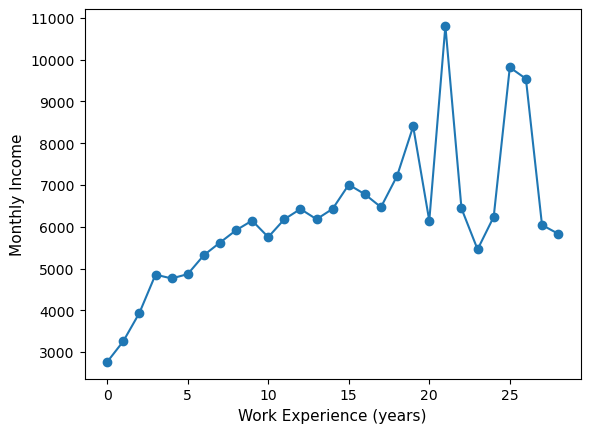

In [77]:
plot_y = mean_salaries['Kk-tulot']
plot_x = np.arange(0,29)

plt.ylabel('Monthly Income', fontsize=11)
plt.xlabel('Work Experience (years)', fontsize=11)

std_dev = mean_salaries['Kk-tulot'].std()

plt.plot(plot_x,plot_y,'-o')